# Labeling

## Plan to label caxton dataset

- Cluster data using GMM and KMeans

- failure types labeling based on domain knowledge (check last images in each print folder)

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib as plt
from ipywidgets import widgets
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
dataset_path = 'caxton_dataset'

caxton = pd.read_csv(os.path.join(dataset_path,'caxton_dataset_full.csv'))

caxton.head(3)

In [ ]:
# Select relevant parameters
params = ['hotend', 'bed']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(caxton[params])

In [ ]:

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(normalized_data)

# Get probabilities and identify low probability points
probabilities = gmm.score_samples(normalized_data)
threshold = np.percentile(probabilities, 5)  # Adjust percentile as needed
caxton['failure'] = (probabilities < threshold).astype(int)

# Add domain knowledge
caxton.loc[(caxton['hotend'] < 160) | (caxton['hotend'] > 250) | 
           (caxton['bed'] < 50) | (caxton['bed'] > 80), 'failure'] = 1

/tmp/ipykernel_3457539/237786880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caxton_sm['failure'] = (probabilities < threshold).astype(int)


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
caxton['cluster'] = kmeans.fit_predict(normalized_data)

# Calculate distance to cluster center
caxton['dist_to_center'] = np.min(kmeans.transform(normalized_data), axis=1)

# Label points far from their cluster center as potential failures
threshold = np.percentile(caxton['dist_to_center'], 95)  
caxton['failure'] = (caxton['dist_to_center'] > threshold).astype(int)

# Add domain knowledge
caxton.loc[(caxton['hotend'] < 160) | (caxton['hotend'] > 250) | 
           (caxton['bed'] < 50) | (caxton['bed'] > 80), 'failure'] = 1

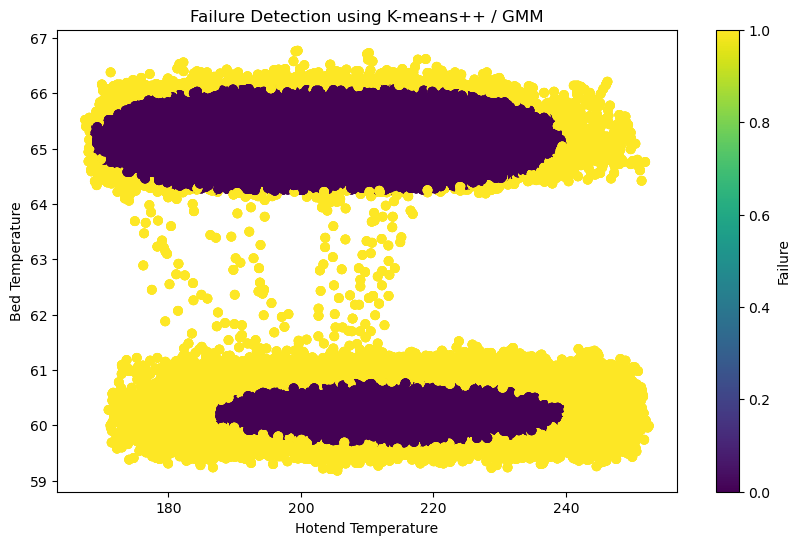

failure
0    0.950001
1    0.049999
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(caxton['hotend'], caxton['bed'], c=caxton['failure'], cmap='viridis')
plt.colorbar(label='Failure')
plt.xlabel('Hotend Temperature')
plt.ylabel('Bed Temperature')
plt.title('Failure Detection using K-means++ / GMM')
plt.show()

print(caxton['failure'].value_counts(normalize=True))

In [ ]:
last_images = caxton.groupby('print_id').last().reset_index()

failure_types = ['No Failure', 'Warping', 'Filament Error', 'Layer Separation', 'Spaghetti Monster', 'Other Failure']

def label_image(print_id, img_path):
    img = plt.imread(os.path.join(dataset_path, img_path))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    dropdown = widgets.Dropdown(options=failure_types, description='Failure Type:')
    display(dropdown)
    
    def on_change(change):
        caxton.loc[caxton['print_id'] == print_id, 'failure_type'] = change['new']
        clear_output()
    
    dropdown.observe(on_change, names='value')

for _, row in last_images.iterrows():
    label_image(row['print_id'], row['img_path'])
    input("Press Enter to continue...")
    clear_output()

In [ ]:
def propagate_labels(group):
    group['failure_type'] = group['failure_type'].fillna(method='ffill')
    return group

caxton = caxton.groupby('print_id').apply(propagate_labels)

In [ ]:
# Load datasets
caxton = pd.read_csv('path/to/caxton.csv')
auto_zmjn2 = pd.read_csv('path/to/auto_zmjn2.csv')
kaggle_errors = pd.read_csv('path/to/kaggle_errors.csv')

# Display basic information
print("Caxton Dataset:")
print(caxton.head())
print(caxton.info())
print(caxton.describe())

print("\nAuto-ZMJ2N Dataset:")
print(auto_zmjn2.head())
print(auto_zmjn2.info())
print(auto_zmjn2.describe())

print("\nKaggle 3D Printing Errors Dataset:")
print(kaggle_errors.head())
print(kaggle_errors.info())
print(kaggle_errors.describe())

# Check for missing values
print("\nMissing Values in Caxton Dataset:")
print(caxton.isnull().sum())

print("\nMissing Values in Auto-ZMJ2N Dataset:")
print(auto_zmjn2.isnull().sum())

print("\nMissing Values in Kaggle 3D Printing Errors Dataset:")
print(kaggle_errors.isnull().sum())

# Plot distributions of numerical features
numerical_features = ['feature1', 'feature2', 'feature3']  
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(caxton[feature], kde=True, label='Caxton')
    sns.histplot(auto_zmjn2[feature], kde=True, label='Auto-ZMJ2N', color='orange')
    sns.histplot(kaggle_errors[feature], kde=True, label='Kaggle Errors', color='green')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

# Plot counts of categorical features
categorical_features = ['failure_type', 'another_categorical_feature']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=caxton, label='Caxton')
    sns.countplot(x=feature, data=auto_zmjn2, label='Auto-ZMJ2N', color='orange')
    sns.countplot(x=feature, data=kaggle_errors, label='Kaggle Errors', color='green')
    plt.title(f'Count of {feature}')
    plt.legend()
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(caxton.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Caxton Dataset')
plt.show()

# Scatter plots for key relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='feature1', y='feature2', data=caxton, label='Caxton')
sns.scatterplot(x='feature1', y='feature2', data=auto_zmjn2, label='Auto-ZMJ2N', color='orange')
sns.scatterplot(x='feature1', y='feature2', data=kaggle_errors, label='Kaggle Errors', color='green')
plt.title('Feature1 vs Feature2')
plt.legend()
plt.show()

# Display sample images
sample_images = ['path/to/sample1.jpg', 'path/to/sample2.jpg']  # Replace with actual paths
for img_path in sample_images:
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Analyze failure types
plt.figure(figsize=(10, 6))
sns.countplot(x='failure_type', data=caxton)
plt.title('Failure Types Distribution - Caxton Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='failure_type', data=auto_zmjn2)
plt.title('Failure Types Distribution - Auto-ZMJ2N Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='failure_type', data=kaggle_errors)
plt.title('Failure Types Distribution - Kaggle 3D Printing Errors Dataset')
plt.show()